# Confidence metrics plotting for AlphaFold + EVcouplings predictions
- Make charts that show average pLDDT, pTM with increasing number of ald chains in complex
- Make a bar chart that shows how the proportion of satisfied (<5-8 Angstrom) multimeric couplings increases going from monomer to hexamer, suggesting that a CONFIDENT Alphafold prediction need not be complete, and that satisfying couplings can help to build a more complete model

In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import pandas as pd
import numpy as np
import string

# enable svg export with editable text
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

def jsonload(inpath):
    with open(inpath) as json_file:
        metrics_json = json.load(json_file)  
        PAE = np.array(metrics_json['pae'])
        plddt = metrics_json['plddt']
        ptm = metrics_json['ptm']
        if "iptm" in metrics_json:
            iptm = metrics_json['iptm']
        else:
            iptm = 0
        return PAE, plddt, ptm, iptm
    
def jsonload_iptm_ptm(inpath):
    with open(inpath) as json_file:
        metrics_json = json.load(json_file)
        iptm_ptm = metrics_json["iptm+ptm"]
        return iptm_ptm

# Load metrics into an indexable dataframe

In [2]:
# path to the JSON files for alphafold prediction
folder = "S:/3-People/Max/2-Results/Bioinformatics/Alphafold structure predictions/SpoVAC_SpoVAD_SpoVAEb/"
paths = [
    "SpoVACDEb_monomer/result_model_3_multimer_v2_pred_1.json",
    "SpoVACDEb_dimer/result_model_5_multimer_v2_pred_2.json",
    "SpoVACDEb_trimer/result_model_1_multimer_v2_pred_0.json",
    "SpoVACDEb_tetramer/result_model_3_multimer_v2_pred_2.json",
]

PAE, plddt, ptm, iptm, name = ([None]*len(paths) for val in range(5))
metrics = pd.DataFrame({'Oligomeric state':name,"pLDDT":plddt,"pTM":ptm,'ipTM':iptm,"PAE": PAE}) # save numpy arrays in dataframe

for i in range(len(paths)):
    inpath = folder+paths[i]
    metrics['PAE'][i], metrics['pLDDT'][i], metrics['pTM'][i], metrics['ipTM'][i] = jsonload(inpath)
    metrics['Oligomeric state'][i] = \
    paths[i].split('/')[0].split('_')[1] # give oligomeric state information in dataframe
    
metrics = metrics.set_index('Oligomeric state')

folder = "S:/3-People/Max/2-Results/Bioinformatics/Alphafold structure predictions/SpoVAC_SpoVAD_SpoVAEb/"
paths = [
    "SpoVACDEb_monomer/ranking_debug.json",
    "SpoVACDEb_dimer/ranking_debug.json",
    "SpoVACDEb_trimer/ranking_debug.json",
    "SpoVACDEb_tetramer/ranking_debug.json",
]

ptm_iptm, best_ptm_iptm, mean_ptm_iptm, std_mean_ptm_iptm, name = ([None]*(len(paths)+1) for val in range(5))
metrics_ptm_iptm = pd.DataFrame({'Oligomeric state':name,'ipTM+pTM':ptm_iptm, 'Highest ipTM+pTM':best_ptm_iptm, 'Average ipTM+pTM':mean_ptm_iptm, 'Standard error ipTM+pTM':std_mean_ptm_iptm}) # save numpy arrays in dataframe
   
# complexes 
for i in range(len(paths)):
    inpath = folder+paths[i]
    i = i + 1
    dict_vals = jsonload_iptm_ptm(inpath)
    metrics_ptm_iptm ['ipTM+pTM'][i]=list(dict_vals.values())
    metrics_ptm_iptm ['Highest ipTM+pTM'][i]=max(metrics_ptm_iptm ['ipTM+pTM'][i])
    metrics_ptm_iptm ['Average ipTM+pTM'][i]=np.mean(metrics_ptm_iptm ['ipTM+pTM'][i])
    metrics_ptm_iptm ['Standard error ipTM+pTM'][i]=np.std(metrics_ptm_iptm ['ipTM+pTM'][i],ddof=1)
    metrics_ptm_iptm ['Oligomeric state'][i] = \
    paths[i-1].split('/')[0].split('_')[1] # give oligomeric state information in dataframe
    
metrics_ptm_iptm = metrics_ptm_iptm.set_index('Oligomeric state')
metrics = metrics.join(metrics_ptm_iptm.iloc[:,0:5])
metrics

,pLDDT,pTM,ipTM,PAE,ipTM+pTM,Highest ipTM+pTM,Average ipTM+pTM,Standard error ipTM+pTM
Oligomeric state,,,,,,,,
monomer,"[46.92, 65.37, 84.03, 87.32, 87.91, 87.87, 88....",0.919356,0.892472,"[[0.75, 1.8, 4.19, 7.34, 8.13, 7.05, 9.12, 9.8...","[0.8882021150613928, 0.8894440800118536, 0.883...",0.897849,0.889617,0.004522
dimer,"[45.2, 61.97, 82.87, 87.86, 89.41, 88.96, 90.3...",0.956233,0.947753,"[[0.75, 1.99, 4.24, 7.65, 8.84, 8.09, 9.53, 10...","[0.9462400047968558, 0.9446915777298024, 0.946...",0.949449,0.947151,0.001744
trimer,"[28.13, 37.54, 53.77, 46.53, 50.88, 60.52, 64....",0.581364,0.535047,"[[0.75, 1.57, 4.27, 7.01, 6.83, 6.54, 7.79, 10...","[0.5443100597250703, 0.5002773850952867, 0.540...",0.54431,0.513674,0.027192
tetramer,"[23.91, 42.25, 51.83, 55.92, 51.83, 52.05, 61....",0.581012,0.535082,"[[0.75, 1.84, 4.79, 6.79, 7.03, 6.68, 8.44, 9....","[0.5257665614401658, 0.5274191638030743, 0.529...",0.544268,0.516484,0.026053


# Plot the metrics

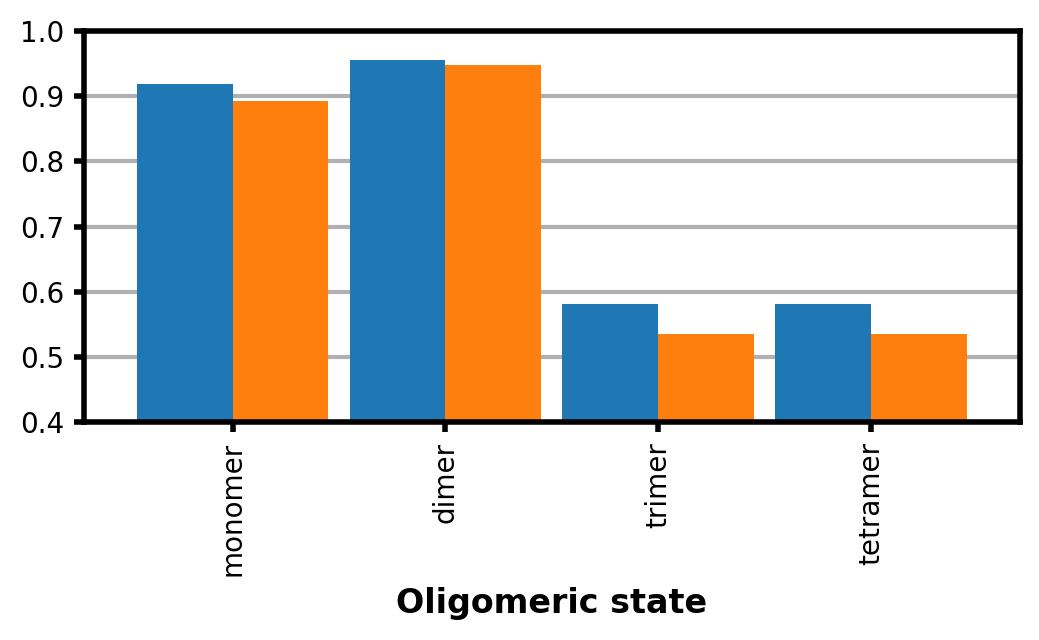

In [3]:
ax = metrics[['pTM','ipTM']].plot.bar(rot = 90, width = 0.9)
fig = plt.gcf()

fig.set_size_inches(5,3)
fig.set_dpi(200)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')

ax.yaxis.grid(True, which='major', linewidth = 1.5)

plt.ylim((.4, 1.0))

ax.set_axisbelow(True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)
ax.get_legend().remove()

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [31]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/spoVACDEb_channel/Plots"
filename = "spoVACDEb_pTM_scores_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

In [ ]:
iptm = pd.DataFrame(pd.to_numeric(metrics['ipTM']))

fig, ax = plt.subplots()
fig.set_size_inches(4,.75)
fig.set_dpi(200)

sns.heatmap(iptm.transpose(), annot = True, cbar = False, 
            cmap = 'RdYlBu', vmin = 0.5, vmax = 1.0, linewidth = 2.0)
ax.set_xticks([])
fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps
plt.show()

In [ ]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/spoVACDEb_channel/Plots"
filename = "spoVACDEb_channel_pTM_scores_heatmap"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# pTM+ipTM (weighted) of all models

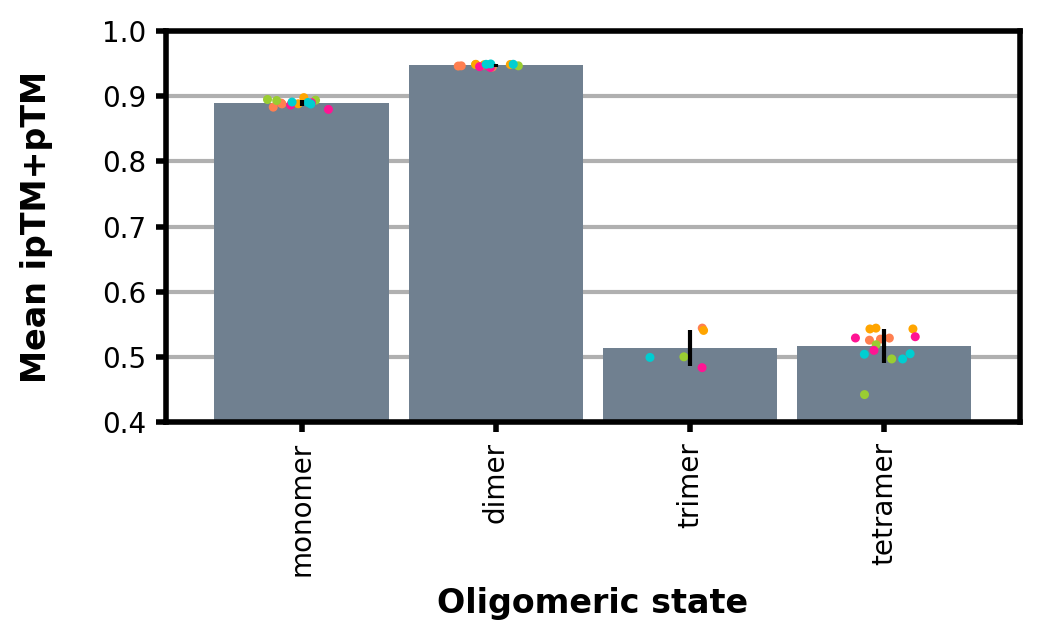

In [32]:
ax = metrics['Average ipTM+pTM'].plot(kind='bar', yerr=metrics['Standard error ipTM+pTM'], rot = 90, width = 0.9, facecolor = 'slategray', label='_nolegend_')
fig = plt.gcf()

col_list_1 = ['coral','yellowgreen','orange','deeppink','darkturquoise']
col_list_2 = np.repeat(col_list_1,3)
    
fig.set_size_inches(5,3)
fig.set_dpi(200)

ax.yaxis.grid(True, which='major', linewidth = 1.5)

i = 0
for iptm_list in metrics['ipTM+pTM'].tolist():
    pos = ax.patches[i].get_x() + ax.patches[i].get_width() / 2
    displacement = np.random.default_rng().normal(size=len(iptm_list))/10
    
    if len(iptm_list) == 5: # color by model
        col_list = col_list_1
    else:
        col_list = col_list_2
    
    ax.scatter([pos+displacement],iptm_list, s=5, facecolor=col_list)
    i = i+1
    
# hack to add labels to legend
modl = 1
for col in col_list_1:
    ax.scatter(-100,-100, s=5, facecolor=col, label='Model '+str(modl))
    modl = modl + 1

plt.ylabel('Mean ipTM+pTM\n', fontweight = 'bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')

plt.ylim((0.4, 1.0))

ax.set_axisbelow(True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8) # using a size in points

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [33]:
# save 
outpath = outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/spoVACDEb_channel/Plots"
filename = "SpoVACDEb_ipTM+pTM_scores_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# pLDDT per residue

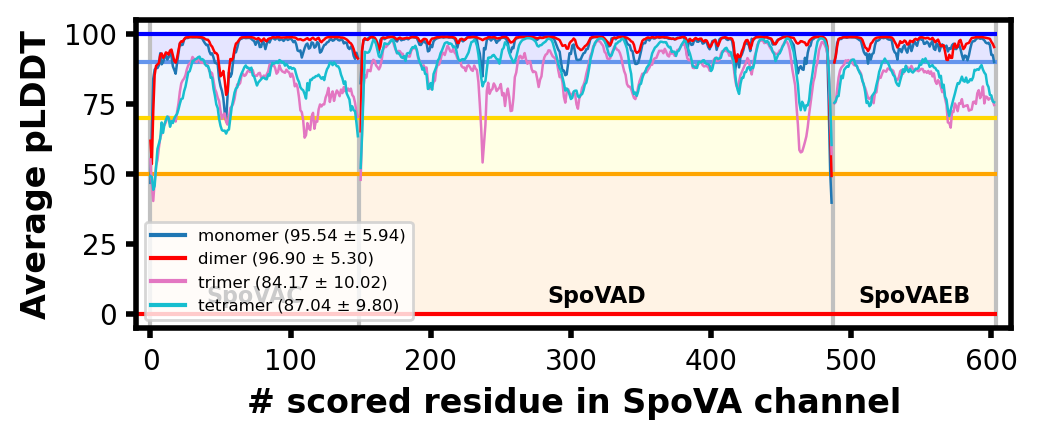

In [34]:
prot = [150,338,116] #length of proteins as list
names = ['SpoVAC','SpoVAD','SpoVAEB']
copies = 4
colors = plt.cm.tab10(np.linspace(0,1,4))
colors[1] = [1, 0, 0, 1]

# make a list of chain boundaries (start and end points)
start_chain = [0]+np.cumsum(prot).tolist()[:-1]
end_chain = (np.cumsum(prot)-1).tolist()

fig, ax = plt.subplots()
fig.set_size_inches(5,2)
fig.set_dpi(200)

plt.vlines([0]+end_chain,-5,105, linestyle='-', 
           linewidth=1.5, color='silver') #plot boundaries for chains
plt.hlines([0,50,70,90,100],-10,sum(prot), linestyle='-', 
           linewidth=1.5, color=['red','orange','gold','cornflowerblue','blue']) #plot boundaries for pLDDT

ax.add_patch(ptch.Rectangle((0,90),sum(prot),10, facecolor = 'blue', alpha = 0.1))
ax.add_patch(ptch.Rectangle((0,70),sum(prot),20, facecolor = 'cornflowerblue', alpha = 0.1))
ax.add_patch(ptch.Rectangle((0,50),sum(prot),20, facecolor = 'yellow', alpha = 0.1))
ax.add_patch(ptch.Rectangle((0,0),sum(prot),50, facecolor = 'darkorange', alpha = 0.1))

copy = 1
for i, row in metrics.iterrows():
    
    # make list of start/end points of protein chains, that can be sliced depending on how many n copies are in complex
    start_chain_iter = np.array(start_chain)*copy
    end_chain_iter = np.array(end_chain)*copy
    iter_names = np.repeat(names,copy)
    
    # iterate over each protein in complex - first C, then D, then EB, and average over each residue for all copies
    for s, e, s_i, e_i, n_i in zip(
            start_chain, end_chain,
            start_chain_iter,end_chain_iter,
            iter_names[::copy]
        ):
        #print(s,e,s_i,e_i,n_i)
        
        #reshape into numpy array with as many rows as copy numbers, and as many columns as residues in protein
        plddt = row['pLDDT'][s_i:e_i]     
        plddt = np.array(plddt).reshape(copy,int((e_i-s_i)/copy))
        plddt = np.mean(plddt, axis = 0)
        #print(np.shape(plddt))
        
        #get global mean and std per protein to print
        #av_plddt = np.mean(plddt, axis = 0)
        #std_plddt = np.std(plddt, axis = 0)
        #plddt_string = f"({av_plddt:.2f} ± {std_plddt:.2f})"
        #ax.plot(range(s,e), plddt, #plot plddt from start to end of chain
        #            linewidth=.9, label = n_i+', '+i+' '+plddt_string, color = colors[copy-1])

        ax.plot(range(s,e), plddt, #plot plddt from start to end of chain
                    linewidth=.9, color = colors[copy-1])
                                                 
    #get global average plddt
    global_av_plddt = np.mean(row['pLDDT'])
    global_std_plddt = np.std(row['pLDDT'])
    global_plddt_string = f"({global_av_plddt:.2f} ± {global_std_plddt:.2f})"
    ax.plot(range(-100,-80), range(0,20), #plot plddt from start to end of chain
                    linewidth=1.5, label = i+' '+global_plddt_string, color = colors[copy-1])
                                                 
    copy = copy + 1

# chain names on axis between start / end chain points
for s,e,n in zip(start_chain, end_chain, names):
    plt.text((s+e)/2, 4, n, ha='center', color='k',weight='bold', size=8)
    
plt.xlabel('# scored residue in SpoVA channel', fontweight = 'bold')
plt.ylabel('Average pLDDT', fontweight = 'bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

plt.ylim((-5,105))
plt.xlim((-10, sum(prot)+10))

legend = plt.legend(fontsize = 6)

plt.gcf().tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps
plt.show()

In [35]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/spoVACDEb_channel/Plots"
filename = "spoVACDEB_pLDDT_scores_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# pLDDT distribution

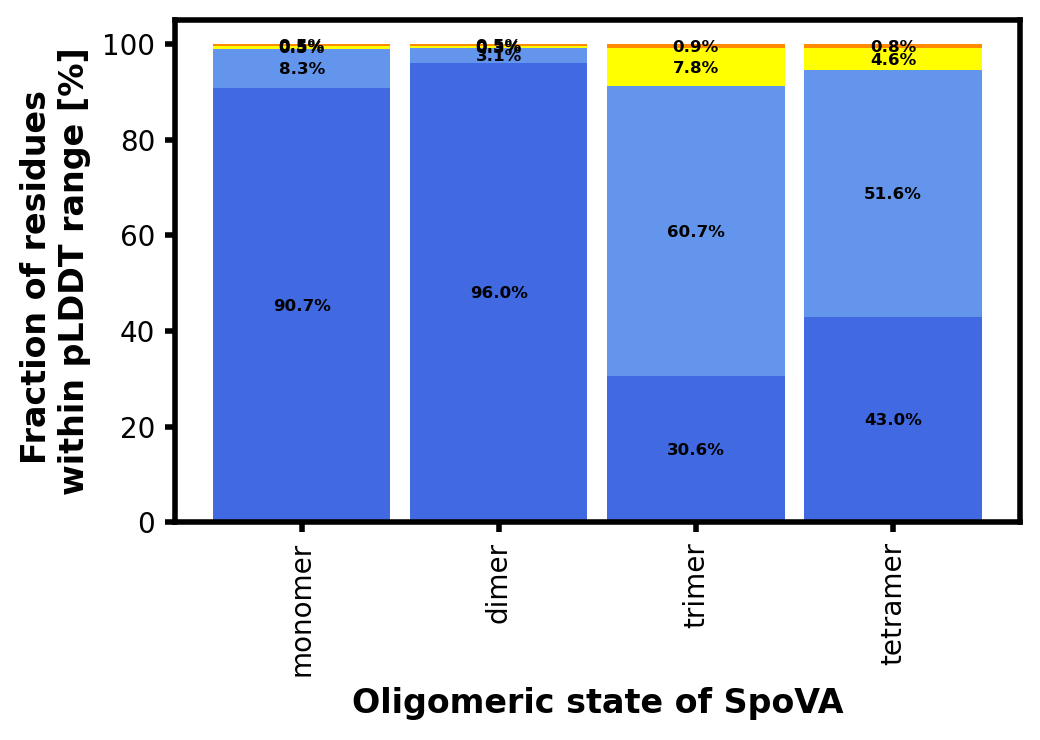

In [47]:
lengths = [150,338,116] #length of protein
number = list(range(1, 5)) #make number of ald chains per prediction
width = 0.9
labels = metrics.index.tolist()

fig, ax = plt.subplots()
fig.set_size_inches(5,3.5)
fig.set_dpi(200)

idx = 0
vhigh = np.zeros(4)
high = np.zeros(4)
caution = np.zeros(4)
low = np.zeros(4)

for i, row in metrics.iterrows():
    # get plddt from all chains
    r = np.array(row['pLDDT'])
    
    length = sum(lengths)*number[idx]
    
    # get the number of residues with a certain pLDDT
    vhigh[idx]=sum(r>=90)
    high[idx]=sum((r<90) & (r>=70))
    caution[idx]=sum((r<70) & (r>=50))
    low[idx]=sum(r<50)
    
    vhigh[idx] = 100*vhigh[idx]/length
    high[idx] = 100*high[idx]/length
    caution[idx] = 100*caution[idx]/length
    low[idx] = 100*low[idx]/length
    idx = idx+1
    
# plot bar charts
ax.bar(labels, vhigh, width = width, color = "royalblue", label = 'pLDDT ≥ 90')
ax.bar(labels, high, bottom = vhigh, width = width, color = "cornflowerblue", label = '70 ≤ pLDDT < 90')
ax.bar(labels, caution, bottom = vhigh+high, width = width, color = "yellow", label = '50 ≤ pLDDT < 70')
ax.bar(labels, low, bottom = vhigh+high+caution, width = width, color = "darkorange", label = 'pLDDT < 50')

for bar in ax.patches:
    ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y()- 1.2,
          # This is actual value we'll show.
          str(round(bar.get_height(),1))+'%' if bar.get_height() > 0 else '',
          # Center the labels and style them a bit.
          ha='center',
          color='k',
          weight='bold',
          size=6
    )
    
plt.xlabel('Oligomeric state of SpoVA', fontweight = 'bold')
plt.ylabel('Fraction of residues \nwithin pLDDT range [%]', fontweight = 'bold')

ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')
plt.xticks(rotation=90)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

#legend = plt.legend(fontsize = 8, 
#                    loc='center left', bbox_to_anchor=(1, 0.5))
plt.gcf().tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps
plt.show()

In [48]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/spoVACDEb_channel/Plots"
filename = "spoVACDEB_pLDDT_distribution_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# PAE in a grid

[150, 488, 604]
[150, 300, 638, 976, 1092, 1208]
[150, 300, 450, 788, 1126, 1464, 1580, 1696, 1812]
[150, 300, 450, 600, 938, 1276, 1614, 1952, 2068, 2184, 2300, 2416]


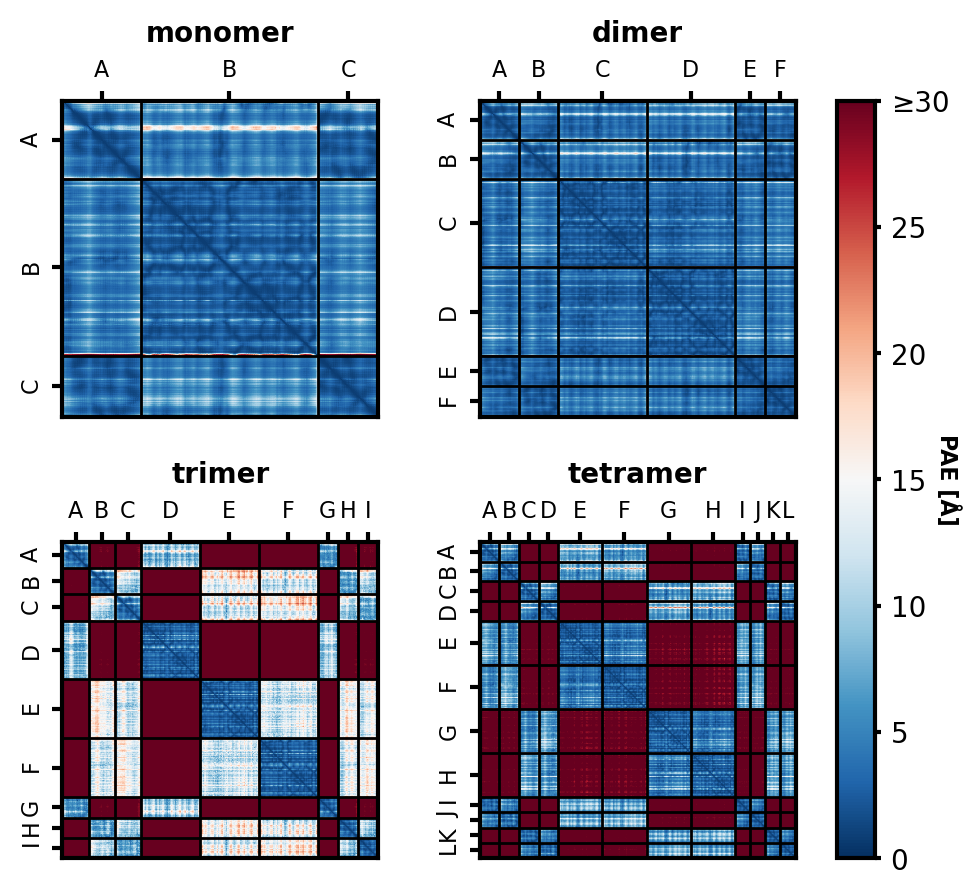

In [4]:
# get PAE and oligomeric state from metrics dataframe
PAE = metrics['PAE']
state = PAE.index.tolist()

prot = np.array([150,338,116]) #length of proteins
names = ['SpoVAC','SpoVAD','SpoVAEB']
copies = 4
chainnames = list(string.ascii_uppercase) #iterable list of chain IDs

fig, axes = plt.subplots(2,2, constrained_layout=True) #make 2x4 axis grid stored within 2-dimensional array
fig.set_size_inches(5,4.5)
fig.set_dpi(200)

i = 0
for idx_ax, ax in np.ndenumerate(axes): # iterate over all axes in array
    
    # make a list of chain boundaries by repeating the length of each protein and adding up
    chains = np.repeat(prot,i+1)
    borders = np.cumsum(chains).tolist()
    print(borders)
    
    # define axis limits by amino acid length of protein
    length = sum(chains)
    tick_pos = (np.concatenate((np.zeros(1),borders[:-1])) + borders) / 2 # get middle point between chain borders to put labels   
        
    ax.set_box_aspect(1) # set to square aspect ratio
    
    mesh = ax.pcolormesh(PAE[i], vmin = 0, vmax = 30, cmap='RdBu_r') #make colored matrix with per-residue PAE color scaling
    
    ax.hlines(borders, 0, length, colors = 'k', linewidth = 1) # plot borders of Ald chains
    ax.vlines(borders, 0, length, colors = 'k', linewidth = 1) 
    
    # set axis labels
    ax.xaxis.tick_top() # for clarity, put on top
    ax.xaxis.set_label_position('top') 
    ax.invert_yaxis() # top left needs to map to residue 1<->1, invert
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.tick_params(width=1.5)
    
    ax.set_title(state[i], fontsize = 10, fontweight = 'bold') # set oligomeric state as axis title
    
    # set x/y-ticks to positions between Ald borders, set to respective chain name
    ax.set_xticks(tick_pos, labels = chainnames[0:3*(i+1)], fontsize = 8)
    ax.set_yticks(tick_pos, labels = chainnames[0:3*(i+1)], fontsize = 8, rotation=90)
    
    i = i + 1 # count up in list

#add colorbar next to subplot grid
cb = fig.colorbar(mesh, ax=axes, orientation='vertical')
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(size = 2, width = 1.5)

#label colorbar
cb.ax.yaxis.set_ticks([0,5,10,15,20,25,30],labels = ['0','5','10','15','20','25','≥30'])
cb.ax.set_ylabel('PAE [Å]', rotation=270, fontsize = 8, fontweight = 'bold')

#padding
fig.set_constrained_layout_pads(w_pad=0./72., h_pad=8./72.,
            hspace=0./72., wspace=0./72.)

plt.show()

In [5]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/spoVACDEb_channel/Plots"
filename = "spoVACDEB_PAE_all"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)

# Couplings with increasing multimerization state (TODO formatting)

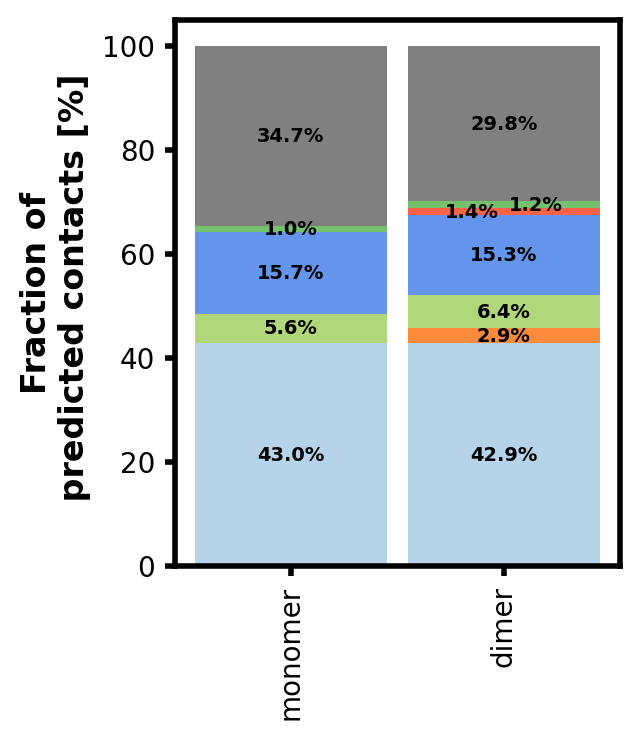

In [39]:
labels = ['monomer','dimer']

# order of oligomeric state is indicated by order of numcouplings
intra_close = np.array([50+327+38,\
                        50+325+39])/966*100
intra_far = np.array([37+77+38,\
                      37+76+35])/966*100
inter_close = np.array([0,\
                        4+20+4])/966*100
inter_far = np.array([0,\
                      5+4+5])/966*100
inter_complex_close = np.array([9+44+1,\
                               9+52+1])/966*100
inter_complex_far = np.array([4+6+0,\
                             4+8+0])/966*100
unsatisfied = np.array([85+137+91+4+18+0,\
                        76+116+84+4+8+0])/966*100

labellist = ('Intra-chain, <5Å',
             'Homomeric, <5Å',
             'Heteromeric, <5Å',
             'Intra-chain, 5-8Å',
             'Homomeric, 5-8Å',
             'Heteromeric, 5-8Å',
             '>8Å')

width = 0.9

fig, ax = plt.subplots()
fig.set_size_inches(3,3.5)
fig.set_dpi(200)

# make stacked bar plot
ax.bar(labels, intra_close, width = width, color = "#B6D4E9")
ax.bar(labels, inter_close, bottom = intra_close, width = width, color = "#FC8C3B")
ax.bar(labels, inter_complex_close, bottom = intra_close+inter_close, width = width, color = "#B1D77B")
ax.bar(labels, intra_far, bottom = intra_close+inter_close+inter_complex_close, width = width, color = "#6495ED")
ax.bar(labels, inter_far, bottom = intra_close+inter_close+inter_complex_close+intra_far, width = width, color = "tomato")
ax.bar(labels, inter_complex_far, bottom = intra_close+inter_close+inter_complex_close+intra_far+inter_far, width = width, color = "#75C16E")
ax.bar(labels, unsatisfied, bottom = intra_close+inter_close+inter_complex_close+intra_far+inter_far+inter_complex_far, width = width, color = "grey")

offsetlist = np.array([2, 2,
              2, 2,
              2, 2,
              2, 2,
              1.33, 3,
              2, 1.5,
              2,2
             ])

# add labels to the patch (https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/)
for offset,bar in zip(offsetlist,ax.patches):
    ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / offset,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y() - 1.2,
          # This is actual value we'll show.
          str(round(bar.get_height(),1))+'%' if bar.get_height() > 0 else '',
          # Center the labels and style them a bit.
          ha='center',
          color='k',
          weight='bold',
          size=7
    )

ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Fraction of\n predicted contacts [%]', fontsize = 12, fontweight = 'bold')

ax.xaxis.label.set_fontweight('bold')
plt.xticks(rotation=90)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)
plt.ylim([0, 105])

# Put a legend to the right of the current axis
#legend = plt.legend(labellist, title="456 total couplings per\nGerAA chain, P>0.9", fontsize = 5, \
#                    loc='center left', bbox_to_anchor=(1, 0.5),
#                   title_fontproperties={'weight':'bold', 'size':10})
#legend.get_title().set_fontsize('5') #legend 'Title' fontsize

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [40]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/spoVACDEb_channel/Plots"
filename = "spoVACDEb_channel_coupling_fractions_adjusted" #no file ending!

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

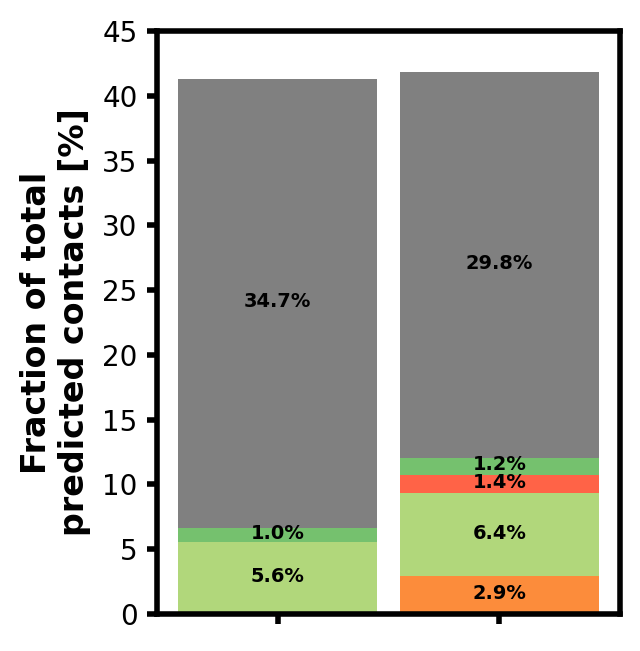

In [41]:
width = 0.9

fig, ax = plt.subplots()
fig.set_size_inches(3,3)
fig.set_dpi(200)

# make stacked bar plot
ax.bar(labels, inter_close, width = width, color = "#FC8C3B")
ax.bar(labels, inter_complex_close, bottom = inter_close, width = width, color = "#B1D77B")
ax.bar(labels, inter_far, bottom = inter_close+inter_complex_close, width = width, color = "tomato")
ax.bar(labels, inter_complex_far, bottom = inter_close+inter_complex_close+inter_far, width = width, color = "#75C16E")
ax.bar(labels, unsatisfied, bottom = inter_complex_far+inter_close+inter_complex_close+inter_far, width = width, color = "grey")

plt.ylim([0, 45])

# add labels to the patch (https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/)
for bar in ax.patches:
    ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y() - 0.3,
          # This is actual value we'll show.
          str(round(bar.get_height(),1))+'%' if bar.get_height() > 0 else '',
          # Center the labels and style them a bit.
          ha='center',
          color='k',
          weight='bold',
          size=7
    )

ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Fraction of total\npredicted contacts [%]', fontsize = 12, fontweight = 'bold')
ax.xaxis.label.set_fontweight('bold')
plt.xticks(rotation=90)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

ax.set_xticklabels([])

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [42]:
# save the plot and coupling data
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/spoVACDEb_channel/Plots"
filename = "spoVACDEb_channel_coupling_fractions_intermolecular_adjusted" #enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)